In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

import plotly.express as px

In [4]:
df = pd.read_csv('/content/customer_campaign.csv', delimiter='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.00,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.00,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.00,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.00,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.00,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# **EDA**

# Data Cleaning

In [5]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.dropna(inplace=True)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [10]:
df.shape

(2216, 29)

In [11]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

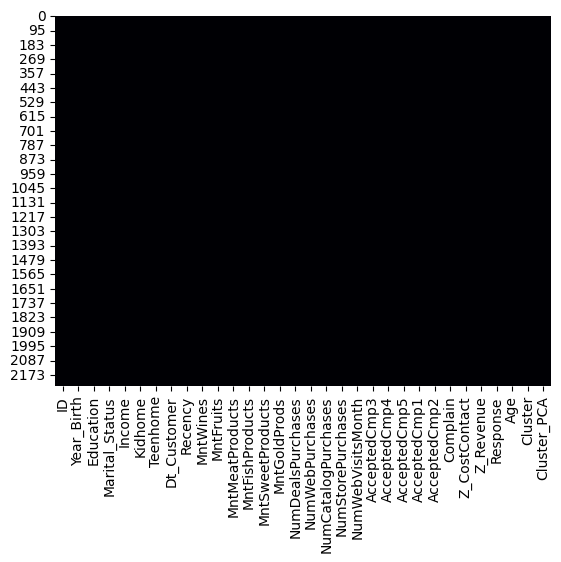

In [33]:
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False);

- Each row represents one entry (row of data).

- Each column is a feature (variable) in the dataset.

- Dark boxes indicate no empty values.

- A light box will indicate an empty value (NaN).

Conclusion:
From your figure, we can see that none of the columns show light boxes - meaning there are no missing values in this dataset.

The row index of the DataFrame (df).
- The number 0 is the first row (0th index).
- The number 95 is the 95th row.
- And so on, until the last row (2173), which means your DataFrame has about 2174 rows of data.
Because matplotlib only displays some numbers at regular intervals to save space and maintain axis readability.

In [14]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,...,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00
mean,5588.35,1968.82,52247.25,0.44,0.51,49.01,305.09,26.36,167.00,37.64,...,5.32,0.07,0.07,0.07,0.06,0.01,0.01,3.00,11.00,0.15
std,3249.38,11.99,25173.08,0.54,0.54,28.95,337.33,39.79,224.28,54.75,...,2.43,0.26,0.26,0.26,0.24,0.12,0.10,0.00,0.00,0.36
min,0.00,1893.00,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
25%,2814.75,1959.00,35303.00,0.00,0.00,24.00,24.00,2.00,16.00,3.00,...,3.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
50%,5458.50,1970.00,51381.50,0.00,0.00,49.00,174.50,8.00,68.00,12.00,...,6.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
75%,8421.75,1977.00,68522.00,1.00,1.00,74.00,505.00,33.00,232.25,50.00,...,7.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
max,11191.00,1996.00,666666.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,...,20.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,11.00,1.00


Count: How many customers are there?
Mean: What's the average age or income?
Standard Deviation: How spread out is the data (e.g., are incomes very different, or are they mostly similar)?
Min: What's the lowest value (e.g., the youngest customer)?
25%, 50%, 75%: These are percentiles, showing where the data is concentrated. The 50% percentile is also the median (the middle value).
Max: What's the highest value (e.g., the oldest customer)?

This code provides descriptions such as mean, count etc. of each feature of the dataset.

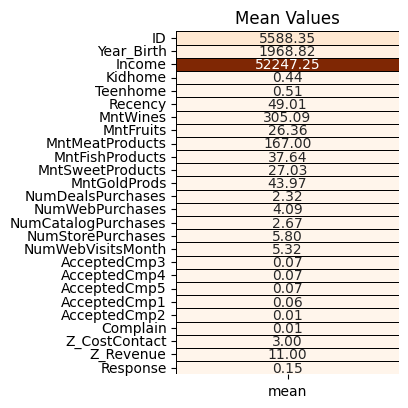

In [15]:
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5))

colors = ['#FF781F','#2D2926']
plt.subplot(1,1,1)
sns.heatmap(df.describe().T[['mean']],cmap = 'Oranges',annot = True,fmt = '.2f',linecolor = 'black',linewidths = 0.4,cbar = False);
plt.title('Mean Values');

fig.tight_layout(pad = 4)

This code provides descriptions such as mean. of each feature of the dataset with heatmaps and attractive visuals.

In [16]:
df['Age'] = 2025 - df['Year_Birth']

In [17]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.00,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,68
1,2174,1954,Graduation,Single,46344.00,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,71
2,4141,1965,Graduation,Together,71613.00,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,60
3,6182,1984,Graduation,Together,26646.00,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,41
4,5324,1981,PhD,Married,58293.00,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.00,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,58
2236,4001,1946,PhD,Together,64014.00,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,3,11,0,79
2237,7270,1981,Graduation,Divorced,56981.00,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,44
2238,8235,1956,Master,Together,69245.00,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,69


In [18]:
print("before capping:")
print(df[['Age', 'Income']].describe())



before capping:
          Age    Income
count 2216.00   2216.00
mean    56.18  52247.25
std     11.99  25173.08
min     29.00   1730.00
25%     48.00  35303.00
50%     55.00  51381.50
75%     66.00  68522.00
max    132.00 666666.00


This output is a statistical summary of the Age and Income columns in dataset before any outlier handling (capping) is applied. Here's what each line means:

Age:

count: There are 2216 valid (non-missing) age values in the dataset.
mean: The average age of customers is 56.18 years.
std: The standard deviation of age is 11.99 years, indicating the typical spread or variability around the mean age.
min: The youngest customer in the dataset is 29 years old.
25%: 25% of customers are 48 years old or younger (this is the first quartile).
50%: 50% of customers are 55 years old or younger (this is the median age).
75%: 75% of customers are 66 years old or younger (this is the third quartile).
max: The oldest customer in the dataset is 132 years old.
Income:

count: There are 2216 valid income values in the dataset.
mean: The average income of customers is 52247.25 (currency units, likely dollars or similar).
std: The standard deviation of income is 25173.08, showing a significant spread in income levels.
min: The lowest income recorded is 1730.
25%: 25% of customers have an income of 35303 or less.
50%: 50% of customers have an income of 51381.50 or less (the median income).
75%: 75% of customers have an income of 68522 or less.
max: The highest income recorded is 666666.
Key Observations:

Age: The age distribution appears relatively normal, with an average around 56 years. The maximum age of 132 could potentially be an outlier and might be worth investigating further.
Income: There's a wider range of income values, indicated by the larger standard deviation. The maximum income of 666666 is considerably higher than the average and other percentiles, suggesting the presence of high-income outliers.

This output is presented "before capping" because it shows the original, unadjusted data. Capping is a technique used to handle outliers by limiting extreme values to a certain range. The code that follows likely aims to address the potential outliers in Age and Income to improve the accuracy of further analysis. By comparing the "before capping" and "after capping" statistics, you can see the impact of outlier handling on the data distribution.

To find out whether the minimum and maximum values are outliers or not before capping.

In [19]:
import numpy as np

def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower, upper)
    return df

to clean up outliers from a column by limiting the minimum and maximum values based on IQR. and the results are cleaner and less plagued by extreme values.

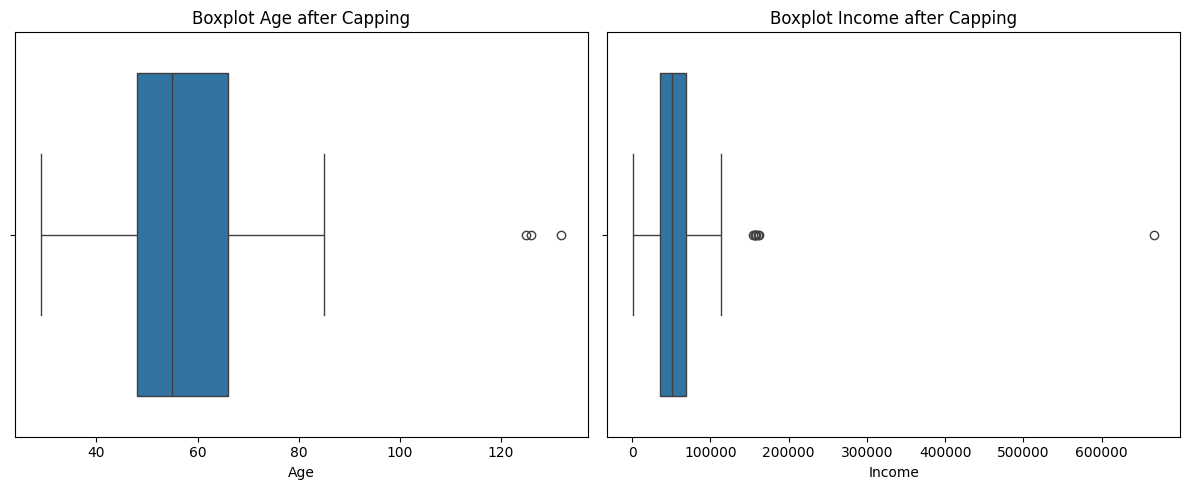

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(ax=axes[0], x=df['Age'])
axes[0].set_title("Boxplot Age after Capping")

sns.boxplot(ax=axes[1], x=df['Income'])
axes[1].set_title("Boxplot Income after Capping")

plt.tight_layout()
plt.show()


 1. Boxplot of Age after Capping
The median (line inside the box) shows the middle age of the data.

- The box shows the range from quartile 1 (Q1) to quartile 3 (Q3), which is the middle 50% of the data.

- The “whisker” line extends from Q1 to the lower bound and from Q3 to the upper bound.

Outliers: Points outside the whisker (e.g. age > 120) are values that are far from the main distribution, despite capping. This means that capping has not completely removed all extreme outliers.

2. Boxplot of Income after Capping (Income)
The distribution is very wide, indicating that there is a very wide range of income values.

- There are many outliers, especially on the right side (high income) despite capping.

- Extreme points (e.g. income > 600,000) still appear, which may be indicative:

- The capping process was only partially done (e.g. only at certain percentiles).

Or, the outlier values were left because they are still considered valid.

conclusion
After capping, the data distribution looks more concentrated in the center (especially Age).

However, outliers still exist, especially in Income, which suggests that the capping may not have been strict enough.

actually the results from after or before capping look the same without any difference.

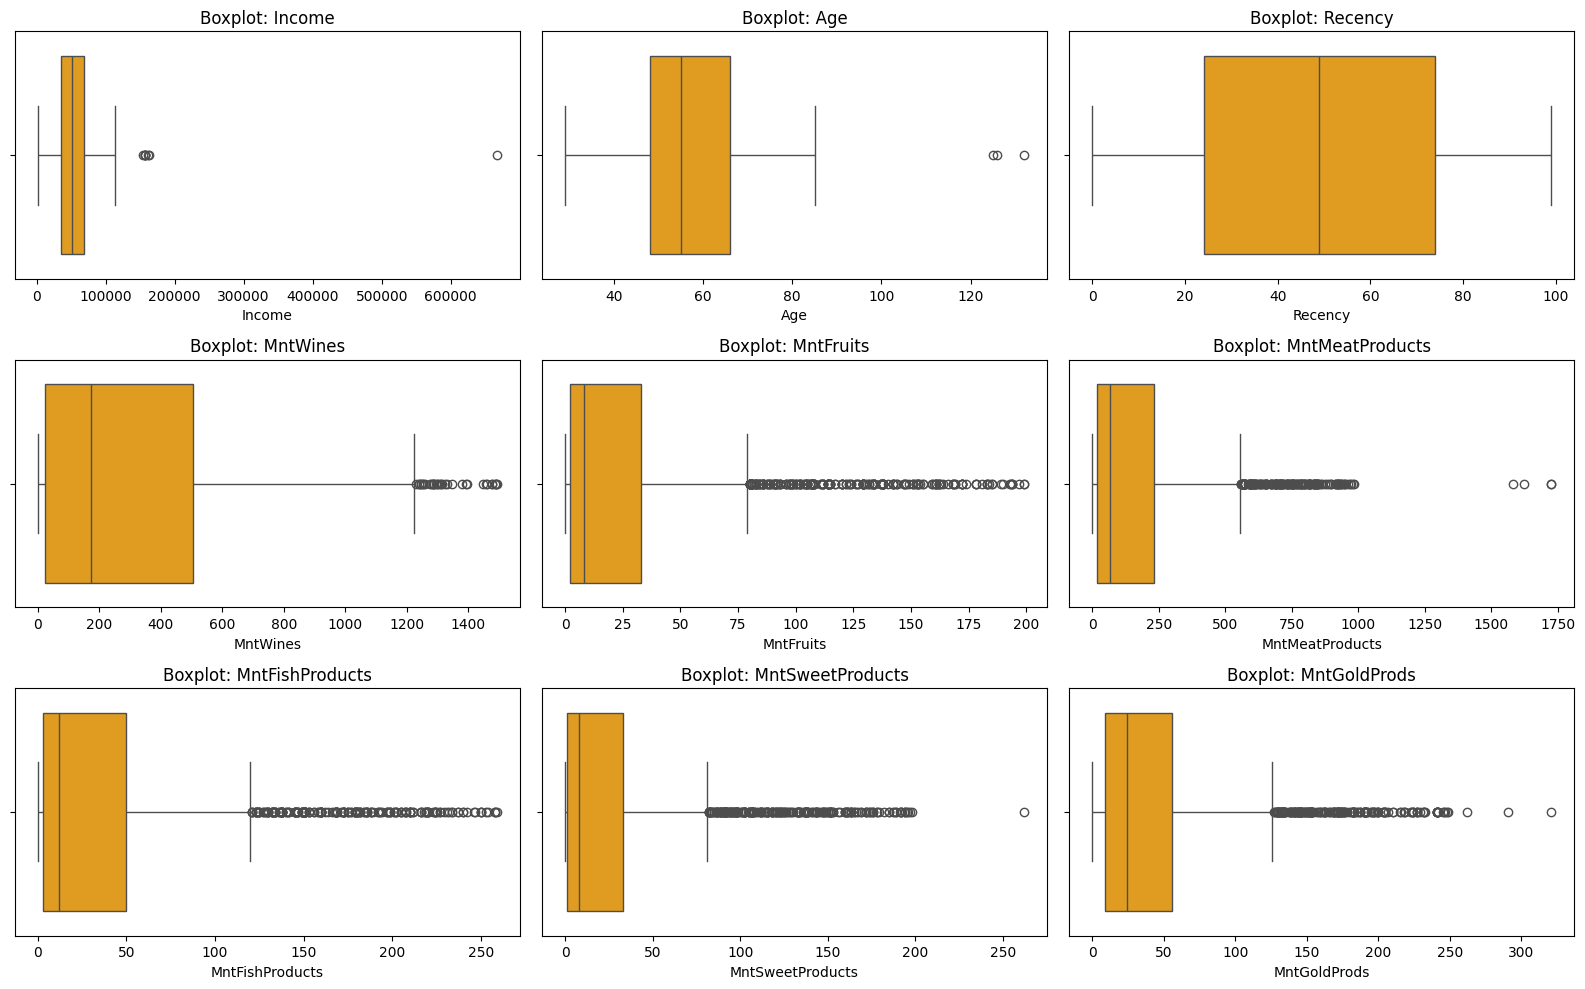

In [21]:
numerical_cols = ['Income', 'Age', 'Recency',
                  'MntWines', 'MntFruits', 'MntMeatProducts',
                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()


This diagram shows the distribution of customer expenses and their characteristics. It can be seen that most customers have incomes below 200,000, although there are some outliers with very high incomes of up to 600,000. Customers' highest expenditures are usually on wine (up to 1400) and meat (up to 1750), while expenditures on products such as fish, fruit, candy, and gold are relatively lower, mostly below $250. In addition, most customers made purchases within the last 60 days, although there were some who had not shopped in a long time.

In conclusion, this data reveals that customers tend to spend more money on wine and meat than other categories. The presence of outliers in wine income and expenditure indicates the need for further data handling for more accurate analysis. Marketing strategies can be focused on high spending customers and those who haven't shopped in a while to increase engagement.

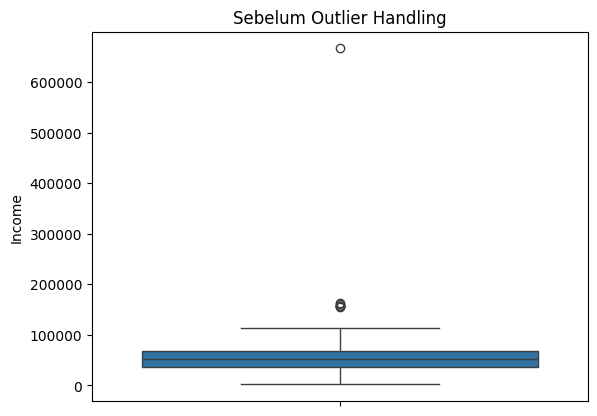

Min: 1730.0
Max: 666666.0


In [22]:
# before capping
sns.boxplot(df['Income'])
plt.title('Sebelum Outlier Handling')
plt.show()

print("Min:", df['Income'].min())
print("Max:", df['Income'].max())


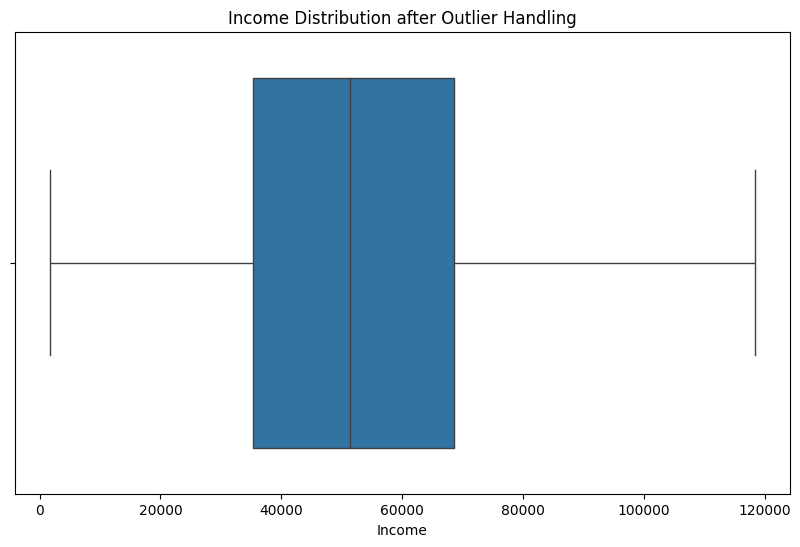

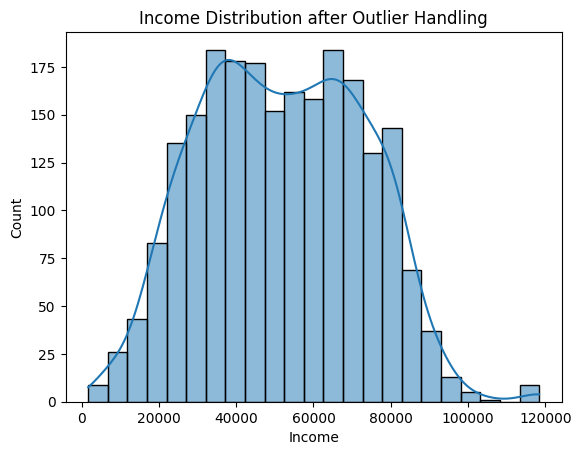

In [23]:

Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]

df['Income'] = np.where(df['Income'] < lower_bound, lower_bound, df['Income'])
df['Income'] = np.where(df['Income'] > upper_bound, upper_bound, df['Income'])

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Income'])
plt.title('Income Distribution after Outlier Handling')
plt.show()

sns.histplot(df['Income'], kde=True)
plt.title('Income Distribution after Outlier Handling')
plt.show()



The income range is now more reasonable at
0-120,000 (previously up to $600,000). This means that extreme values (very high incomes) have been limited or eliminated.

The data becomes more balanced and representative.
Statistical analysis (such as averaging or segmentation) will be more accurate as it is no longer distorted by outliers.

In [24]:

df['Income'].fillna(df['Income'].median(), inplace=True)


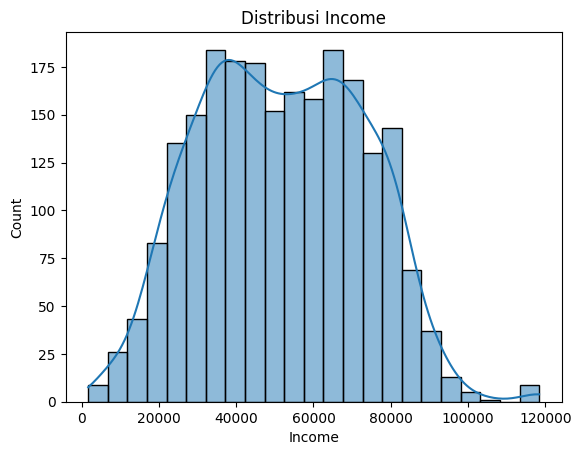

In [25]:
sns.histplot(df['Income'], kde=True)
plt.title("Distribusi Income")
plt.show()


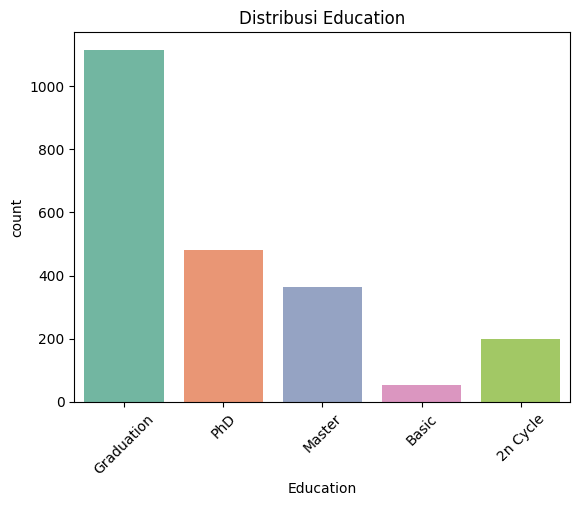

In [26]:
sns.countplot(data=df, x='Education', palette='Set2')
plt.title("Distribusi Education")
plt.xticks(rotation=45)
plt.show()


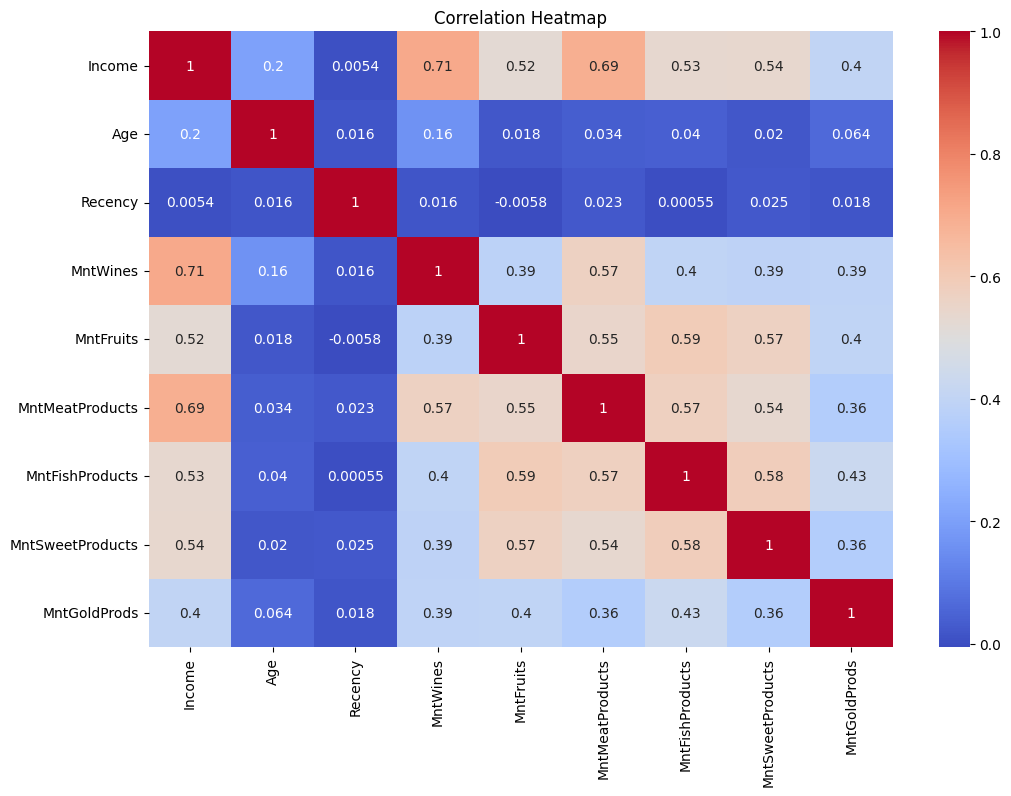

In [35]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Most strikingly, income shows a strong correlation with spending on wine (0.71) and meat products (0.69), meaning that customers with higher incomes tend to buy more of these premium products. In addition, there is a pattern that customers who buy one type of product (such as fruit or fish) tend to also buy other products, with a medium correlation in the range of 0.36-0.59. Interestingly, customer age and recency (length of time since last purchase) show almost no correlation with other variables, meaning these factors have less influence on shopping habits. The findings suggest focusing on the high-income customer segment in premium product marketing strategies, as well as considering bundling packages for correlated products.

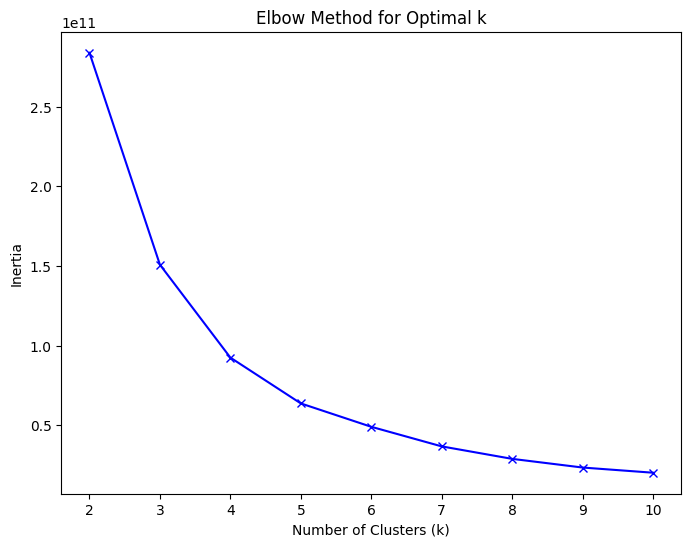

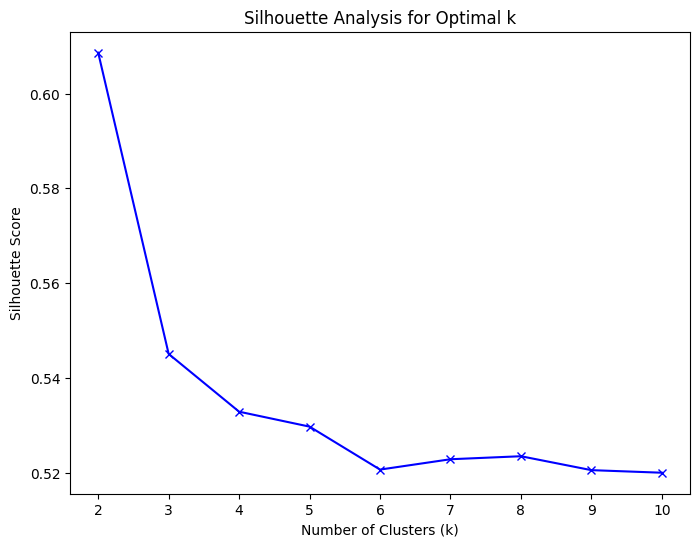

In [28]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = df[['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

inertia = []
silhouette_avg = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


    silhouette_avg.append(silhouette_score(X, kmeans.labels_))


# Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Silhouette
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_avg, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()

Silhouette Score → k = 2 is more ideal for clearly separated clusters.

Elbow Method → k = 3 or 4 also makes sense for a balance of complexity and results.

The final choice can depend on the goal: want the cleanest clusters (k = 2) or enough detail but still efficient (k = 3 or 4).

In [29]:

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
df['Cluster'] = kmeans.labels_

fig = px.scatter_3d(df, x='Income', y='Recency', z='MntWines', color='Cluster',
                    title='K-Means Clustering ')
fig.show()


In [30]:
from sklearn.preprocessing import StandardScaler

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the data and assign it to X_scaled

df['Cluster'] = kmeans.fit_predict(X_scaled)

numerical_features = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                      'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Age']
print(df.groupby('Cluster')[numerical_features].agg(['mean', 'median']))

          Income          Recency        MntWines        MntFruits         \
            mean   median    mean median     mean median      mean median   
Cluster                                                                     
0       36608.02 36921.00   48.79  49.00    74.87  29.00      5.73   3.00   
1       75107.58 75507.00   49.01  50.00   559.03 510.00     85.08  80.00   
2       66563.38 65507.00   49.48  51.00   598.16 560.50     25.92  21.00   

        MntMeatProducts        MntFishProducts        MntSweetProducts         \
                   mean median            mean median             mean median   
Cluster                                                                         
0                 32.59  18.00            8.67   4.00             5.97   3.00   
1                471.09 432.00          118.78 111.00            86.53  83.00   
2                222.43 170.50           38.00  29.00            26.92  21.00   

        MntGoldProds          Age         
       

Based on the clustering results with KMeans, the data is divided into three groups with different characteristics. Cluster 0 consists of individuals with the lowest income, averaging around IDR 36,608, and have very minimal spending in almost all product categories such as wine, meat, fish, and gold products. This group is also dominated by individuals around 54 years old, so it can be assumed that they are frugal consumers or less active shoppers.

Cluster 1 is the group with the highest income, averaging around IDR 75,107, and very high spending across all product categories. They buy the most wine, meat, fish, sweets and gold products. Their average age is around 56 years old. This group can be categorized as premium consumers who are very active shoppers and have high purchasing power.

Meanwhile, Cluster 2 has a fairly high income, around IDR 66,563, and is the group with the oldest average age, around 59 years old. They have the highest spending on wine products, but other spending is still moderate compared to Cluster 1. This suggests that they may be loyal consumers who focus on certain types of products, especially wine and other premium products.

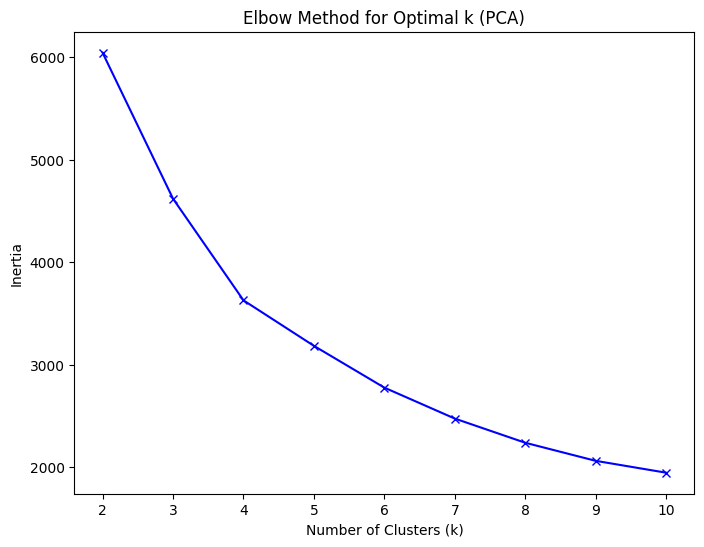

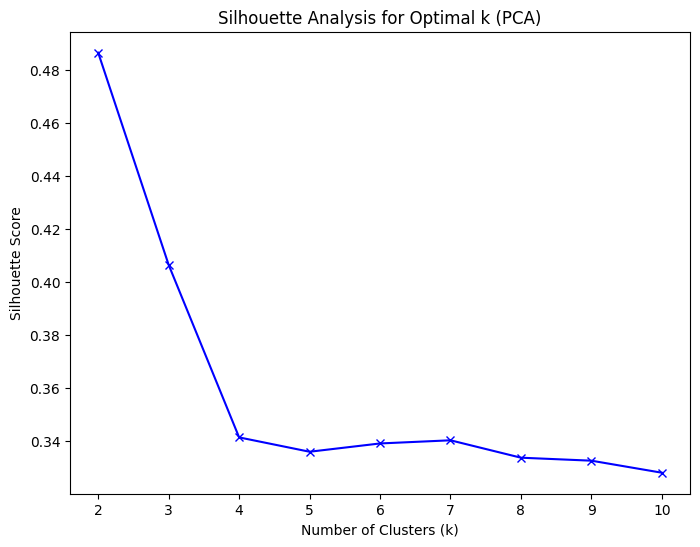

              Income          Recency        MntWines        MntFruits         \
                mean   median    mean median     mean median      mean median   
Cluster_PCA                                                                     
0           37498.72 37406.00   48.48  49.00    86.68  31.00      6.16   3.00   
1           69347.72 68126.00   51.34  54.00   646.92 620.00     30.45  24.00   
2           74006.27 74627.00   47.14  47.00   519.04 482.00     90.23  85.00   

            MntMeatProducts        MntFishProducts        MntSweetProducts  \
                       mean median            mean median             mean   
Cluster_PCA                                                                  
0                     33.55  19.00            9.22   4.00             6.31   
1                    290.17 219.00           44.19  34.00            30.66   
2                    434.95 398.50          126.23 121.00            93.45   

                   MntGoldProds          Age

In [31]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
inertia = []
silhouette_avg = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)
    silhouette_avg.append(silhouette_score(X_pca, kmeans.labels_))

# Elbow Method (PCA)
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (PCA)')
plt.show()

# Silhouette (PCA)
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_avg, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k (PCA)')
plt.show()


optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster_PCA'] = kmeans.fit_predict(X_pca)

# Analyze cluster characteristics
print(df.groupby('Cluster_PCA')[numerical_features].agg(['mean', 'median']))


These results show the summary characteristics of the three consumer groups (Cluster_PCA 0, 1, and 2) formed after clustering with data that has been reduced in dimension using PCA (Principal Component Analysis).
Cluster 0 is the group with the lowest income (around IDR 37,498) and also the lowest expenditure in almost all product categories such as wine, fruit, meat, fish, sweets and gold products. Their average age is around 55 years old. They are likely to be frugal or minimalist shoppers.
Cluster 1 contains consumers with a middle income (around Rp69,347), and fairly high spending but more focused on specific products, such as wine and meat. Despite their high spending, they are not as wasteful as cluster 2 in all categories. Their average age is around 59 years old, so this group can be classified as established consumers who are selective in their spending.
Cluster 2 is the group with the highest income (around IDR 74,006) and the highest spending in almost all categories, especially premium products such as sweets and gold products. They are also around 56 years old. This shows that this cluster contains loyal and royal consumers, who are active shoppers and have high purchasing power.

In [32]:
from sklearn.decomposition import PCA
import plotly.express as px

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)


kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca)

df['Cluster_PCA'] = labels_pca


fig = px.scatter_3d(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    z=X_pca[:, 2],
    color=labels_pca.astype(str),
    title='K-Means Clustering with PCA',
    labels={
        'x': 'Principal Component 1',
        'y': 'Principal Component 2',
        'z': 'Principal Component 3'
    }
)
fig.show()


Without PCA, the clusters are more detailed per product.

Cluster 0: Low income &amp; spending, age 54 → frugal consumer.

Cluster 1: Highest income &amp; spending, age 56 → premium consumer.

Cluster 2: Medium income, age 59 → wine focused, loyal consumers.

With PCA, cluster by overall spending pattern.

Cluster 0: Lowest income &amp; spending, age 55 → frugal/minimalist.

Cluster 1: Middle income, selective spending (wine &amp; meat), age 59 → wise consumer.

Cluster 2: Highest income &amp; spending (sweets &amp; gold), age 56 → splurge consumer.

Conclusion:
Without PCA is suitable for per-product analysis.
With PCA it is more concise & focused on shopping patterns.

Asses :
Interpretability: The non-PCA version retains more feature-specific details, making it easier to see exactly which product a cluster spends on the most. This is useful for targeted marketing by product category.

Clarity of Segmentation: The PCA version simplifies the data and highlights consumer behavior patterns more clearly, especially distinguishing between general luxury shoppers and selective spenders.

Behavioral Insight: PCA reveals nuanced insights — for instance, showing that Cluster_PCA 1 is not the highest spender but is the most selective, something less obvious in the original data.

Efficiency: PCA also helps reduce noise and redundancy, leading to potentially more robust and generalizable clusters, particularly beneficial when scaling or applying this model in other contexts.